In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
idx = pd.IndexSlice

In [58]:
laps = pd.read_pickle('data/96/merge_laps')
laps

0     Lap  Lap time Pos Tyres      Weather Temp  Hum Events
12 1    0         -   9  Soft  Very Cloudy  31°  46%      -
   2   1B  1:28.769  14  Soft  Very Cloudy  31°  46%      -
   3   2B  1:19.039  14  Soft  Very Cloudy  31°  46%      -
   4    3  1:19.700  14  Soft  Very Cloudy  31°  46%      -
   5    4  1:19.088  13  Soft  Very Cloudy  31°  46%      -
...    ..       ...  ..   ...          ...  ...  ...    ...
11 55  54  1:46.117   8  Rain         Rain  32°  86%    Pit
   56  55  2:14.593  10  Rain         Rain  31°  86%      -
   57  56  1:41.646  10  Rain         Rain  31°  86%      -
   58  57  1:40.089  10  Rain         Rain  31°  86%      -
   59  58  1:40.303  10  Rain         Rain  31°  86%      -

[241 rows x 8 columns]

In [59]:
pits = pd.read_pickle('data/96/merge_pits')
pits

Pit                          Pitstop reason Tyres condition  \
12 0  Stop 1 (Lap 19)                   No more fuel was left              9%   
   1  Stop 2 (Lap 40)                   No more fuel was left              2%   
   2  Stop 3 (Lap 47)  Tyres change due to the weather change             70%   
   3  Stop 4 (Lap 64)  Tyres change due to the weather change             31%   
10 0   Stop 1 (Lap 3)  Tyres change due to the weather change             86%   
   1  Stop 2 (Lap 22)                   No more fuel was left             34%   
   2  Stop 3 (Lap 35)                   No more fuel was left             54%   
   3  Stop 4 (Lap 48)                   No more fuel was left             53%   
13 0  Stop 1 (Lap 23)                   No more fuel was left             27%   
   1  Stop 2 (Lap 46)                   No more fuel was left             26%   
11 0   Stop 1 (Lap 3)  Tyres change due to the weather change             84%   
   1  Stop 2 (Lap 28)                   No more fuel was left             41%   
   2  Stop 3 (Lap 54)                   No more fuel was left             38%   

     Fuel left Refilled to Pit time  
12 0        1%   80 liters  26.222s  
   1        0%   80 liters  24.887s  
   2       30%   80 liters  31.897s  
   3       14%   80 liters  22.104s  
10 0       49%   No refill  34.035s  
   1        2%   60 liters  21.711s  
   2        0%   60 liters  26.025s  
   3        0%   60 liters  25.337s  
13 0        2%  100 liters  24.217s  
   1        2%   90 liters  26.544s  
11 0       37%   75 liters  36.748s  
   1        1%   75 liters  25.267s  
   2        0%   75 liters  27.122s

Convert columns to numeric, tyre and fuel to % of max capacity

In [60]:
pits['Pit'] = pd.to_numeric(pits['Pit'].str.split().str[-1].str[:-1])
pits['Tyres condition'] = pd.to_numeric(pits['Tyres condition'].str[:-1])/100
pits['Fuel left'] = pd.to_numeric(pits['Fuel left'].str[:-1])/100
pits['Pit time'] = pd.to_numeric(pits['Pit time'].str[:-1])
pits['Refilled to'] = (pd.to_numeric(pits['Refilled to'].str.split().str[0], 'coerce')/180).fillna(pits['Fuel left'])
pits

Pit                          Pitstop reason  Tyres condition  Fuel left  \
12 0   19                   No more fuel was left             0.09       0.01   
   1   40                   No more fuel was left             0.02       0.00   
   2   47  Tyres change due to the weather change             0.70       0.30   
   3   64  Tyres change due to the weather change             0.31       0.14   
10 0    3  Tyres change due to the weather change             0.86       0.49   
   1   22                   No more fuel was left             0.34       0.02   
   2   35                   No more fuel was left             0.54       0.00   
   3   48                   No more fuel was left             0.53       0.00   
13 0   23                   No more fuel was left             0.27       0.02   
   1   46                   No more fuel was left             0.26       0.02   
11 0    3  Tyres change due to the weather change             0.84       0.37   
   1   28                   No more fuel was left             0.41       0.01   
   2   54                   No more fuel was left             0.38       0.00   

      Refilled to  Pit time  
12 0     0.444444    26.222  
   1     0.444444    24.887  
   2     0.444444    31.897  
   3     0.444444    22.104  
10 0     0.490000    34.035  
   1     0.333333    21.711  
   2     0.333333    26.025  
   3     0.333333    25.337  
13 0     0.555556    24.217  
   1     0.500000    26.544  
11 0     0.416667    36.748  
   1     0.416667    25.267  
   2     0.416667    27.122

Create 'Delta' column with laps before each pit stop

In [61]:
pits['Delta'] = pits['Pit'].diff()
pits.loc[idx[:, 0], 'Delta'] = pits.loc[idx[:, 0], 'Pit']
pits

Pit                          Pitstop reason  Tyres condition  Fuel left  \
12 0   19                   No more fuel was left             0.09       0.01   
   1   40                   No more fuel was left             0.02       0.00   
   2   47  Tyres change due to the weather change             0.70       0.30   
   3   64  Tyres change due to the weather change             0.31       0.14   
10 0    3  Tyres change due to the weather change             0.86       0.49   
   1   22                   No more fuel was left             0.34       0.02   
   2   35                   No more fuel was left             0.54       0.00   
   3   48                   No more fuel was left             0.53       0.00   
13 0   23                   No more fuel was left             0.27       0.02   
   1   46                   No more fuel was left             0.26       0.02   
11 0    3  Tyres change due to the weather change             0.84       0.37   
   1   28                   No more fuel was left             0.41       0.01   
   2   54                   No more fuel was left             0.38       0.00   

      Refilled to  Pit time  Delta  
12 0     0.444444    26.222   19.0  
   1     0.444444    24.887   21.0  
   2     0.444444    31.897    7.0  
   3     0.444444    22.104   17.0  
10 0     0.490000    34.035    3.0  
   1     0.333333    21.711   19.0  
   2     0.333333    26.025   13.0  
   3     0.333333    25.337   13.0  
13 0     0.555556    24.217   23.0  
   1     0.500000    26.544   23.0  
11 0     0.416667    36.748    3.0  
   1     0.416667    25.267   25.0  
   2     0.416667    27.122   26.0

Fuel and tyre used columns so we can build a linear model with 0 intercept

In [62]:
pits['Fuel used'] = pits['Refilled to'].shift(1) - pits['Fuel left']
pits.loc[idx[:, 0], 'Fuel used'] = pd.NA
pits['Tyres used'] = 1 - pits['Tyres condition']
pits

Pit                          Pitstop reason  Tyres condition  Fuel left  \
12 0   19                   No more fuel was left             0.09       0.01   
   1   40                   No more fuel was left             0.02       0.00   
   2   47  Tyres change due to the weather change             0.70       0.30   
   3   64  Tyres change due to the weather change             0.31       0.14   
10 0    3  Tyres change due to the weather change             0.86       0.49   
   1   22                   No more fuel was left             0.34       0.02   
   2   35                   No more fuel was left             0.54       0.00   
   3   48                   No more fuel was left             0.53       0.00   
13 0   23                   No more fuel was left             0.27       0.02   
   1   46                   No more fuel was left             0.26       0.02   
11 0    3  Tyres change due to the weather change             0.84       0.37   
   1   28                   No more fuel was left             0.41       0.01   
   2   54                   No more fuel was left             0.38       0.00   

      Refilled to  Pit time  Delta  Fuel used  Tyres used  
12 0     0.444444    26.222   19.0        NaN        0.91  
   1     0.444444    24.887   21.0   0.444444        0.98  
   2     0.444444    31.897    7.0   0.144444        0.30  
   3     0.444444    22.104   17.0   0.304444        0.69  
10 0     0.490000    34.035    3.0        NaN        0.14  
   1     0.333333    21.711   19.0   0.470000        0.66  
   2     0.333333    26.025   13.0   0.333333        0.46  
   3     0.333333    25.337   13.0   0.333333        0.47  
13 0     0.555556    24.217   23.0        NaN        0.73  
   1     0.500000    26.544   23.0   0.535556        0.74  
11 0     0.416667    36.748    3.0        NaN        0.16  
   1     0.416667    25.267   25.0   0.406667        0.59  
   2     0.416667    27.122   26.0   0.416667        0.62

Removed tyre per pit stop

In [63]:
pits['Tyres'] = laps.loc[zip(pits['Pit'].index.get_level_values(0), pits['Pit'] - 1), 'Tyres'].values
pits['Tyres'] = pits['Tyres'].str.split('(').str[0]# Worn tyres append a (W), remove that
pits

Pit                          Pitstop reason  Tyres condition  Fuel left  \
12 0   19                   No more fuel was left             0.09       0.01   
   1   40                   No more fuel was left             0.02       0.00   
   2   47  Tyres change due to the weather change             0.70       0.30   
   3   64  Tyres change due to the weather change             0.31       0.14   
10 0    3  Tyres change due to the weather change             0.86       0.49   
   1   22                   No more fuel was left             0.34       0.02   
   2   35                   No more fuel was left             0.54       0.00   
   3   48                   No more fuel was left             0.53       0.00   
13 0   23                   No more fuel was left             0.27       0.02   
   1   46                   No more fuel was left             0.26       0.02   
11 0    3  Tyres change due to the weather change             0.84       0.37   
   1   28                   No more fuel was left             0.41       0.01   
   2   54                   No more fuel was left             0.38       0.00   

      Refilled to  Pit time  Delta  Fuel used  Tyres used       Tyres  
12 0     0.444444    26.222   19.0        NaN        0.91        Soft  
   1     0.444444    24.887   21.0   0.444444        0.98        Soft  
   2     0.444444    31.897    7.0   0.144444        0.30        Soft  
   3     0.444444    22.104   17.0   0.304444        0.69        Rain  
10 0     0.490000    34.035    3.0        NaN        0.14        Rain  
   1     0.333333    21.711   19.0   0.470000        0.66      Medium  
   2     0.333333    26.025   13.0   0.333333        0.46      Medium  
   3     0.333333    25.337   13.0   0.333333        0.47      Medium  
13 0     0.555556    24.217   23.0        NaN        0.73        Hard  
   1     0.500000    26.544   23.0   0.535556        0.74        Hard  
11 0     0.416667    36.748    3.0        NaN        0.16  Extra Soft  
   1     0.416667    25.267   25.0   0.406667        0.59        Rain  
   2     0.416667    27.122   26.0   0.416667        0.62        Rain

Use track data to convert pit lap to km according to track in the calendar

In [64]:
tracks = pd.read_pickle('data/96/tracks')
tracks.index += 1
tracks

,Track name,Country,Kms,Laps,Lap distance,Power,Handling,Acceleration,Category,GPs held
1,Interlagos,Brazil,305.9,71,4.308 km,NaN,NaN,NaN,F1,33
2,Melbourne,Australia,307.6,58,5.303 km,NaN,NaN,NaN,F1,33
3,Mexico City,Mexico,305.0,69,4.42 km,NaN,NaN,NaN,F1,41
4,Buenos Aires,Argentina,306.6,72,4.258 km,NaN,NaN,NaN,ex F1,35
5,Las Vegas,United States,305.9,50,6.118 km,NaN,NaN,NaN,F1,1
6,Fuji,Japan,305.4,67,4.558 km,NaN,NaN,NaN,ex F1,36
7,Yas Marina,United Arab Emirates,305.5,55,5.555 km,NaN,NaN,NaN,F1,39
8,Shanghai,China,305.2,56,5.45 km,NaN,NaN,NaN,F1,36
9,Istanbul,Turkey,309.4,58,5.334 km,NaN,NaN,NaN,ex F1,36
10,Sepang,Malaysia,310.4,55,5.644 km,NaN,NaN,NaN,ex F1,39


In [65]:
tracks.loc[pits.index.get_level_values(0).astype(int), "Kms"]

12    306.4
12    306.4
12    306.4
12    306.4
10    310.4
10    310.4
10    310.4
10    310.4
13    308.0
13    308.0
11    304.3
11    304.3
11    304.3
Name: Kms, dtype: float64

In [71]:
tracks.loc[pits.index.get_level_values(0).astype(int), "Kms"]

12    306.4
12    306.4
12    306.4
12    306.4
10    310.4
10    310.4
10    310.4
10    310.4
13    308.0
13    308.0
11    304.3
11    304.3
11    304.3
Name: Kms, dtype: float64

In [74]:
pits['Kms'] = tracks.loc[pits.index.get_level_values(0).astype(int), "Kms"].values*pits['Pit'].values
pits

Pit                          Pitstop reason  Tyres condition  Fuel left  \
12 0   19                   No more fuel was left             0.09       0.01   
   1   40                   No more fuel was left             0.02       0.00   
   2   47  Tyres change due to the weather change             0.70       0.30   
   3   64  Tyres change due to the weather change             0.31       0.14   
10 0    3  Tyres change due to the weather change             0.86       0.49   
   1   22                   No more fuel was left             0.34       0.02   
   2   35                   No more fuel was left             0.54       0.00   
   3   48                   No more fuel was left             0.53       0.00   
13 0   23                   No more fuel was left             0.27       0.02   
   1   46                   No more fuel was left             0.26       0.02   
11 0    3  Tyres change due to the weather change             0.84       0.37   
   1   28                   No more fuel was left             0.41       0.01   
   2   54                   No more fuel was left             0.38       0.00   

      Refilled to  Pit time  Delta  Fuel used  Tyres used       Tyres      kms  
12 0     0.444444    26.222   19.0        NaN        0.91        Soft   5821.6  
   1     0.444444    24.887   21.0   0.444444        0.98        Soft  12256.0  
   2     0.444444    31.897    7.0   0.144444        0.30        Soft  14400.8  
   3     0.444444    22.104   17.0   0.304444        0.69        Rain  19609.6  
10 0     0.490000    34.035    3.0        NaN        0.14        Rain    931.2  
   1     0.333333    21.711   19.0   0.470000        0.66      Medium   6828.8  
   2     0.333333    26.025   13.0   0.333333        0.46      Medium  10864.0  
   3     0.333333    25.337   13.0   0.333333        0.47      Medium  14899.2  
13 0     0.555556    24.217   23.0        NaN        0.73        Hard   7084.0  
   1     0.500000    26.544   23.0   0.535556        0.74        Hard  14168.0  
11 0     0.416667    36.748    3.0        NaN        0.16  Extra Soft    912.9  
   1     0.416667    25.267   25.0   0.406667        0.59        Rain   8520.4  
   2     0.416667    27.122   26.0   0.416667        0.62        Rain  16432.2

Linearly model tyre and fuel % use per lap, need to omit first laps since they have NaNs (will fix once starting fuel is scrapped).

In [ ]:
colors = {'Extra Soft': 'pink', 'Soft': 'red', 'Medium': 'yellow', 'Hard': 'grey', 'Rain': 'blue'}
tyres = colors.keys()

In [ ]:
mtyres = {}
for tyre, data in pits.groupby('Tyres'):
    delta = data['Delta'].to_numpy()[:, np.newaxis]
    mtyres[tyre] = np.linalg.lstsq(delta, data['Tyres used'], rcond=None)[0][0]

delta = pits['Delta'].to_numpy()[:, np.newaxis]
mf = np.linalg.lstsq(delta[pits['Fuel used'].notna()], pits['Fuel used'][pits['Fuel used'].notna()], rcond=None)[0][0]

print("\n".join([f'{tyre}%/lap: {round(mtyres[tyre], 3)}' for tyre in mtyres]))
print('Fuel%/lap:', round(mf, 3))

Extra Soft%/lap: 0.053
Hard%/lap: 0.032
Medium%/lap: 0.035
Rain%/lap: 0.027
Soft%/lap: 0.047
Fuel%/lap: 0.02


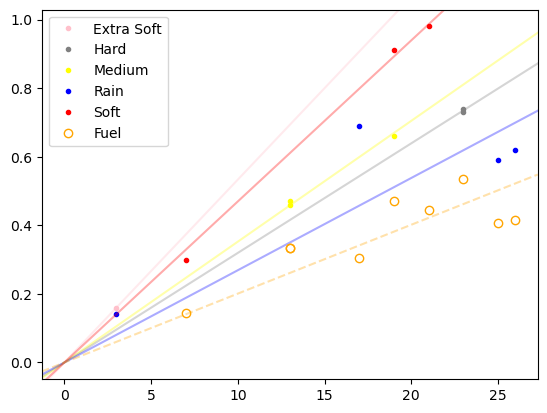

In [ ]:
for tyre, data in pits.groupby('Tyres'):
    plt.plot(data['Delta'], data['Tyres used'], '.', label = tyre, c = colors[tyre])
    plt.axline((0, 0), slope = mtyres[tyre], c = colors[tyre], alpha = 0.33)

plt.plot(pits['Delta'], pits['Fuel used'], 'o', label = 'Fuel', c = 'orange', fillstyle = 'none')
plt.axline((0, 0), slope = mf, c = 'orange', alpha = 0.33, linestyle = '--')

plt.legend()